## 은닉층의 활성화값 분포

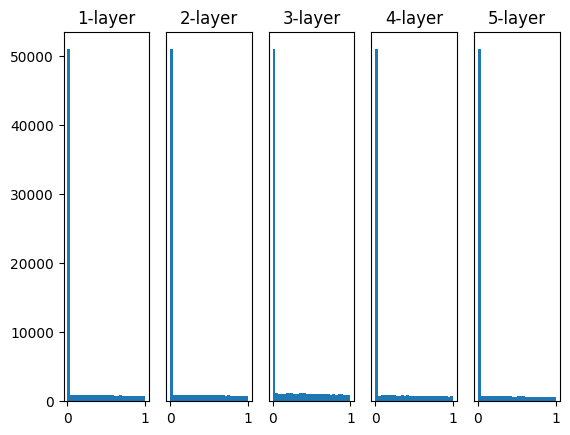

In [7]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)


input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)  # Xavier 초깃값
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  # He 초깃값

    a = np.dot(x, w)

    # 활성화 함수도 바꿔가며 실험해보자！
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i + 1) + "-layer")
    if i != 0:
        plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

## 가중치 초기화 비교

===========iteration:0===========
std=0.01:2.3024717462114657
Xavier:2.2912060112229042
He:2.283618156382915
===========iteration:100===========
std=0.01:2.303195827113417
Xavier:2.1920526583631483
He:1.5881321554795176
===========iteration:200===========
std=0.01:2.303156461577962
Xavier:1.993501912008182
He:0.6922959519197407
===========iteration:300===========
std=0.01:2.3036274947713893
Xavier:1.538194901137871
He:0.5709878633560835
===========iteration:400===========
std=0.01:2.2984247214892477
Xavier:0.818776313299981
He:0.39971336307336414
===========iteration:500===========
std=0.01:2.306835739355666
Xavier:0.7276167553044303
He:0.3607326412756712
===========iteration:600===========
std=0.01:2.2966169646038317
Xavier:0.5599938850308978
He:0.3843248797920851
===========iteration:700===========
std=0.01:2.3042212901697594
Xavier:0.4586493047869845
He:0.2629935102088179
===========iteration:800===========
std=0.01:2.3037093399281674
Xavier:0.4520575430378502
He:0.30672737742235684

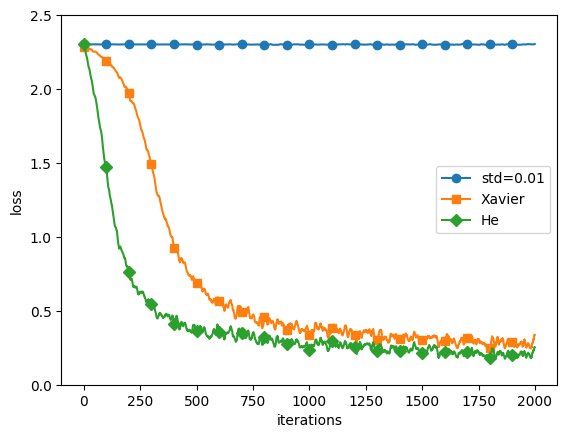

In [8]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {"std=0.01": 0.01, "Xavier": "sigmoid", "He": "relu"}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(
        input_size=784,
        hidden_size_list=[100, 100, 100, 100],
        output_size=10,
        weight_init_std=weight_type,
    )
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"std=0.01": "o", "Xavier": "s", "He": "D"}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(
        x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key
    )
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()